In [1]:
!pip install tweepy
!pip install textblob
!pip install pycountry
!pip install langdetect
!pip install pandas
!pip install sklearn

In [ ]:
conda install -c conda-forge wordcloud=1.6.0 

In [33]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anadeory/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anadeory/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Authentication
consumerKey = "a0cLYyjRSHFcXcTTU7RvYGgHh"
consumerSecret = "uQVZt6LIcgporqJ3iAjDpehFufKgAfqYzPpbreIEHUcN70rXPw"
accessToken = "1461438773078769666-uAYj5L4fiB5lzA0T5fj1VtW5gdckie"
accessTokenSecret = "UBGFL3v5kFJZm8VTXMoecGQ2eerYteQ3rRa4ia7vVbX2b"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: bitcoin
Please enter how many tweets to analyze: 500


In [7]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  160
negative number:  64
neutral number:  276


In [8]:
tweet_list

,0
0,RT @EMPOWR_us: Empower Oversight Sues SEC For ...
1,RT @MinusWells: Make it or break it week... Wh...
2,RT @CoinCornerMolly: Paying for a coffee with ...
3,RT @HPOS10INU: Coinmarketcap has announced it ...
4,RT @CryptoYodaGuru: En lo que esperamos la sub...
...,...
495,RT @saylor: #Bitcoin on #Lightning⚡️ is the fu...
496,@fckboislayer bitcoin?
497,"RT @Crypto_Woof: Our 3rd Giveaway Is Live, Thi..."
498,RT @ODELL: bitcoin will be perceived as a risk...


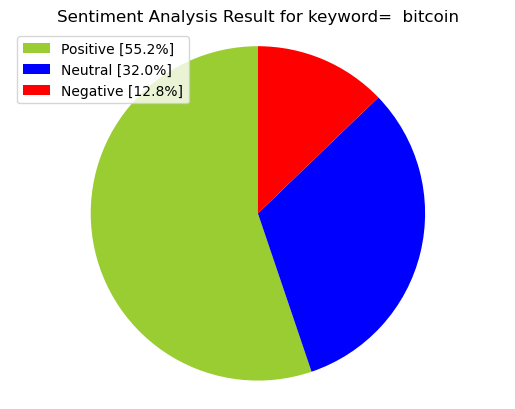

In [41]:
#Creating PieCart

labels = ['Positive ['+str(neutral)+'%]' , 'Neutral ['+str(positive)+'%]','Negative ['+str(negative)+'%]']
sizes = [neutral, positive, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [10]:
tweet_list.drop_duplicates(inplace = True)

In [11]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @EMPOWR_us: Empower Oversight Sues SEC For ...,RT @EMPOWR_us: Empower Oversight Sues SEC For ...
1,RT @MinusWells: Make it or break it week... Wh...,RT @MinusWells: Make it or break it week... Wh...
2,RT @CoinCornerMolly: Paying for a coffee with ...,RT @CoinCornerMolly: Paying for a coffee with ...
3,RT @HPOS10INU: Coinmarketcap has announced it ...,RT @HPOS10INU: Coinmarketcap has announced it ...
4,RT @CryptoYodaGuru: En lo que esperamos la sub...,RT @CryptoYodaGuru: En lo que esperamos la sub...
...,...,...
494,@100trillionUSD @Birdson64827145 How much more...,@100trillionUSD @Birdson64827145 How much more...
495,RT @saylor: #Bitcoin on #Lightning⚡️ is the fu...,RT @saylor: #Bitcoin on #Lightning⚡️ is the fu...
496,@fckboislayer bitcoin?,@fckboislayer bitcoin?
498,RT @ODELL: bitcoin will be perceived as a risk...,RT @ODELL: bitcoin will be perceived as a risk...


In [12]:
tweet_list

,0,text
0,RT @EMPOWR_us: Empower Oversight Sues SEC For ...,RT @EMPOWR_us: Empower Oversight Sues SEC For ...
1,RT @MinusWells: Make it or break it week... Wh...,RT @MinusWells: Make it or break it week... Wh...
2,RT @CoinCornerMolly: Paying for a coffee with ...,RT @CoinCornerMolly: Paying for a coffee with ...
3,RT @HPOS10INU: Coinmarketcap has announced it ...,RT @HPOS10INU: Coinmarketcap has announced it ...
4,RT @CryptoYodaGuru: En lo que esperamos la sub...,RT @CryptoYodaGuru: En lo que esperamos la sub...
...,...,...
494,@100trillionUSD @Birdson64827145 How much more...,@100trillionUSD @Birdson64827145 How much more...
495,RT @saylor: #Bitcoin on #Lightning⚡️ is the fu...,RT @saylor: #Bitcoin on #Lightning⚡️ is the fu...
496,@fckboislayer bitcoin?,@fckboislayer bitcoin?
498,RT @ODELL: bitcoin will be perceived as a risk...,RT @ODELL: bitcoin will be perceived as a risk...


In [13]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @EMPOWR_us: Empower Oversight Sues SEC For ...,empower oversight sues sec for access to foia...
1,RT @MinusWells: Make it or break it week... Wh...,make it or break it week what do you fine ...
2,RT @CoinCornerMolly: Paying for a coffee with ...,paying for a coffee with bitcoin lightning n...
3,RT @HPOS10INU: Coinmarketcap has announced it ...,coinmarketcap has announced it will be sponso...
4,RT @CryptoYodaGuru: En lo que esperamos la sub...,en lo que esperamos la subida de bitcoin un ...
5,RT @Rare_Metaverse: Rocket Arena Airdrop is li...,rocket arena airdrop is live now earn 200 r...
6,"What if, for the first time this entire cycle,...",what if for the first time this entire cycle ...
7,"When in doubt, Zoom ________. #Bitcoin https:/...",when in doubt zoom bitcoin
8,"RT @javierbitcoin: Lo que se avecina, es una c...",lo que se avecina es una crisis del modelo m...
9,RT @WhyBitcoinJ: Gratz if you grabbed some of ...,gratz if you grabbed some of the first 90 of...


In [14]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @EMPOWR_us: Empower Oversight Sues SEC For ...,empower oversight sues sec for access to foia...,-0.100000,0.600000,positive,0.119,0.725,0.155,0.1779
1,RT @MinusWells: Make it or break it week... Wh...,make it or break it week what do you fine ...,0.416667,0.500000,positive,0.000,0.878,0.122,0.2023
2,RT @CoinCornerMolly: Paying for a coffee with ...,paying for a coffee with bitcoin lightning n...,0.250000,0.333333,negative,0.236,0.764,0.000,-0.5719
3,RT @HPOS10INU: Coinmarketcap has announced it ...,coinmarketcap has announced it will be sponso...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @CryptoYodaGuru: En lo que esperamos la sub...,en lo que esperamos la subida de bitcoin un ...,0.000000,0.000000,positive,0.000,0.840,0.160,0.2732
5,RT @Rare_Metaverse: Rocket Arena Airdrop is li...,rocket arena airdrop is live now earn 200 r...,0.289899,0.744444,positive,0.000,0.758,0.242,0.6249
6,"What if, for the first time this entire cycle,...",what if for the first time this entire cycle ...,-0.013889,0.500000,negative,0.091,0.909,0.000,-0.1027
7,"When in doubt, Zoom ________. #Bitcoin https:/...",when in doubt zoom bitcoin,0.000000,0.000000,negative,0.385,0.615,0.000,-0.3612
8,"RT @javierbitcoin: Lo que se avecina, es una c...",lo que se avecina es una crisis del modelo m...,0.000000,0.000000,negative,0.409,0.591,0.000,-0.8860
9,RT @WhyBitcoinJ: Gratz if you grabbed some of ...,gratz if you grabbed some of the first 90 of...,0.183333,0.200000,positive,0.176,0.627,0.197,0.1779


In [15]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [16]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [17]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,179,45.09
positive,160,40.30
negative,58,14.61


In [21]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


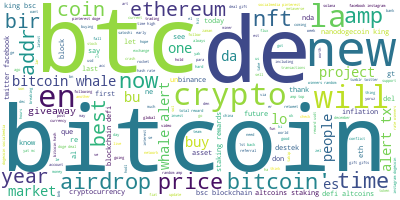

In [22]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


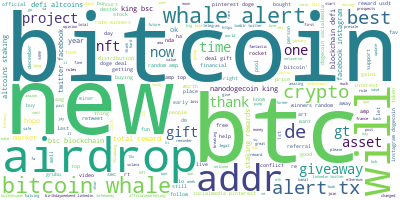

In [23]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


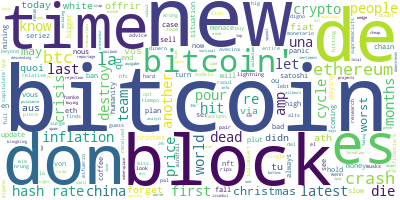

In [24]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


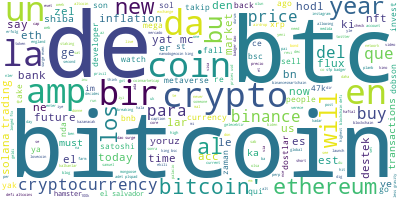

In [25]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [26]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [27]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,93.62
neutral,91.42
positive,105.77


In [28]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,15.97
neutral,14.73
positive,16.37


In [29]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [30]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [34]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [35]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [36]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [37]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @EMPOWR_us: Empower Oversight Sues SEC For ...,empower oversight sues sec for access to foia...,-0.100000,0.600000,positive,0.119,0.725,0.155,0.1779,116,16,empower oversight sues sec for access to foia...,"[, empower, oversight, sues, sec, for, access,...","[, empower, oversight, sues, sec, access, foia...","[, empow, oversight, sue, sec, access, foia, d..."
1,RT @MinusWells: Make it or break it week... Wh...,make it or break it week what do you fine ...,0.416667,0.500000,positive,0.000,0.878,0.122,0.2023,75,14,make it or break it week what do you fine ...,"[, make, it, or, break, it, week, what, do, yo...","[, make, break, week, fine, people, thing, btc...","[, make, break, week, fine, peopl, thing, btc,..."
2,RT @CoinCornerMolly: Paying for a coffee with ...,paying for a coffee with bitcoin lightning n...,0.250000,0.333333,negative,0.236,0.764,0.000,-0.5719,97,15,paying for a coffee with bitcoin lightning n...,"[, paying, for, a, coffee, with, bitcoin, ligh...","[, paying, coffee, bitcoin, lightning, nfc, pa...","[, pay, coffe, bitcoin, lightn, nfc, pair, ano..."
3,RT @HPOS10INU: Coinmarketcap has announced it ...,coinmarketcap has announced it will be sponso...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,126,16,coinmarketcap has announced it will be sponso...,"[, coinmarketcap, has, announced, it, will, be...","[, coinmarketcap, announced, sponsoring, tomfe...","[, coinmarketcap, announc, sponsor, tomfelton,..."
4,RT @CryptoYodaGuru: En lo que esperamos la sub...,en lo que esperamos la subida de bitcoin un ...,0.000000,0.000000,positive,0.000,0.840,0.160,0.2732,75,12,en lo que esperamos la subida de bitcoin un ...,"[, en, lo, que, esperamos, la, subida, de, bit...","[, en, lo, que, esperamos, la, subida, de, bit...","[, en, lo, que, esperamo, la, subida, de, bitc..."


In [38]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

397 Number of reviews has 1964 words
